In [1]:
import sys
%matplotlib inline
sys.path.append("/home/aneesh/Documents/master_thesis")
import os
import torch
from torchvision import transforms
from src.data_loader.freihand_loader import F_DB
from src.models.baseline_model import BaselineModel
from torch.utils.data import DataLoader
from src.data_loader.utils import convert_2_5D_to_3D
from pytorch_lightning import Trainer
from comet_ml import Experiment
import pytorch_lightning as pl
from pytorch_lightning.loggers import CometLogger

In [2]:
from src.visualization.visualize import plot_hand
from src.constants import MASTER_THESIS_DIR
from src.utils import read_json

In [3]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [4]:
# comet_logger = CometLogger(
#     api_key=os.environ.get("COMET_API_KEY"),
#     project_name="master-thesis",
#     workspace="dahiyaaneesh",
#     save_dir='/home/aneesh/Documents/master_thesis/models'
# )

In [5]:
f_db = F_DB(
    root_dir="../data/raw/FreiHAND_pub_v2/training/rgb",
    labels_path="../data/raw/FreiHAND_pub_v2/training_xyz.json",
    camera_param_path="/home/aneesh/Documents/master_thesis/data/raw/FreiHAND_pub_v2/training_K.json",
#     transform=None,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    ),
    gray=False,
)

In [6]:
# train_percentage = 90
# train, val = torch.utils.data.random_split(f_db,[len(f_db)*train_percentage//100, len(f_db)- len(f_db)*train_percentage//100 ])
# train_data_loader = DataLoader(train , batch_size = 16)
# val_data_loader = DataLoader(val, batch_size = 4)
# model = BaselineModel()
# trainer = Trainer(max_epochs=10, logger=comet_logger)
# trainer.fit(model,train_data_loader,val_data_loader)

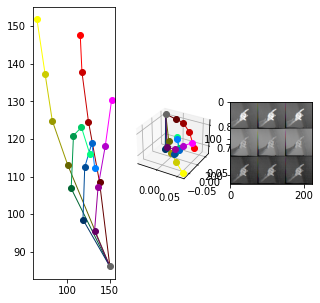

In [7]:
id = 10
A = f_db[id]["joints"]
s = f_db[id]["scale"]
K = f_db[id]["K"]
img = f_db[id]["image"]
Axy = f_db[id]["joints_3D"]

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection='3d')
# ax3 = fig.add_subplot(133)
plot_hand(ax1, np.array(A))
# Axy = convert_2_5D_to_3D(A, s, K)
plot_hand(ax2, np.array(Axy), True)
plt.subplot(133)
plt.imshow(img.reshape((224, 224, 3)))
plt.show()

In [8]:
convert_2_5D_to_3D(A,s,K)

tensor(124.6531)
tensor(124.6531) tensor(150.1772) tensor(0.)
tensor(2115.6013) tensor(171.3072) tensor(328.2487)
tensor(nan)


tensor([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]])

In [20]:
from torchvision import transforms
im = transforms.ToPILImage()(img).convert("RGB")